In [3]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

from data_loader import load_datasets, preprocess_dataset, optimize_performance
from model import build_model, fine_tune_model
from train import train_model
from evaluate import evaluate_model, get_predictions, plot_confusion_matrix, plot_history
import tensorflow as tf

c:\Users\jenish\OneDrive\Desktop\FACE-MASK-DETECTION\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [4]:
# Load the pre-trained model if it exists
import os
model_path = '../models/mobilenetv2_mask_detector.h5'
if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path)
    print("Loaded pre-trained model.")
else:
    print("Model not found, will build a new one.")

Loaded pre-trained model.


## Load and Preprocess Data

Load datasets from the data directory.

In [6]:
# Load and extract data from zip if needed
train_data, test_data, val_data = load_datasets('../data/Face Mask Dataset/Train', '../data/Face Mask Dataset/Test', '../data/Face Mask Dataset/Validation', zip_path='../data/archive (5).zip')

print(train_data.class_names)

# Preprocess
train_ds = preprocess_dataset(train_data, augment=True)
val_ds = preprocess_dataset(val_data, augment=False)
test_ds = preprocess_dataset(test_data, augment=False)

# Optimize
train_ds = optimize_performance(train_ds)
val_ds = optimize_performance(val_ds)
test_ds = optimize_performance(test_ds)

Data already extracted in ../data/Face Mask Dataset
Found 10000 files belonging to 2 classes.
Found 992 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
['WithMask', 'WithoutMask']


## Build Model

Build the MobileNetV2-based model.

In [ ]:
model, base_model = build_model()
model.summary()

## Train Model

Train the model with transfer learning.

In [ ]:
history = train_model(model, train_ds, val_ds, epochs=5)

## Fine-tune Model

Fine-tune the model.

In [ ]:
model = fine_tune_model(model, base_model)
fine_history = train_model(model, train_ds, val_ds, epochs=5)

## Evaluate Model

Evaluate the model on test data.

31/31 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.7399 - loss: 0.9448
Test Accuracy: 0.7399
Test Loss: 0.9448
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━

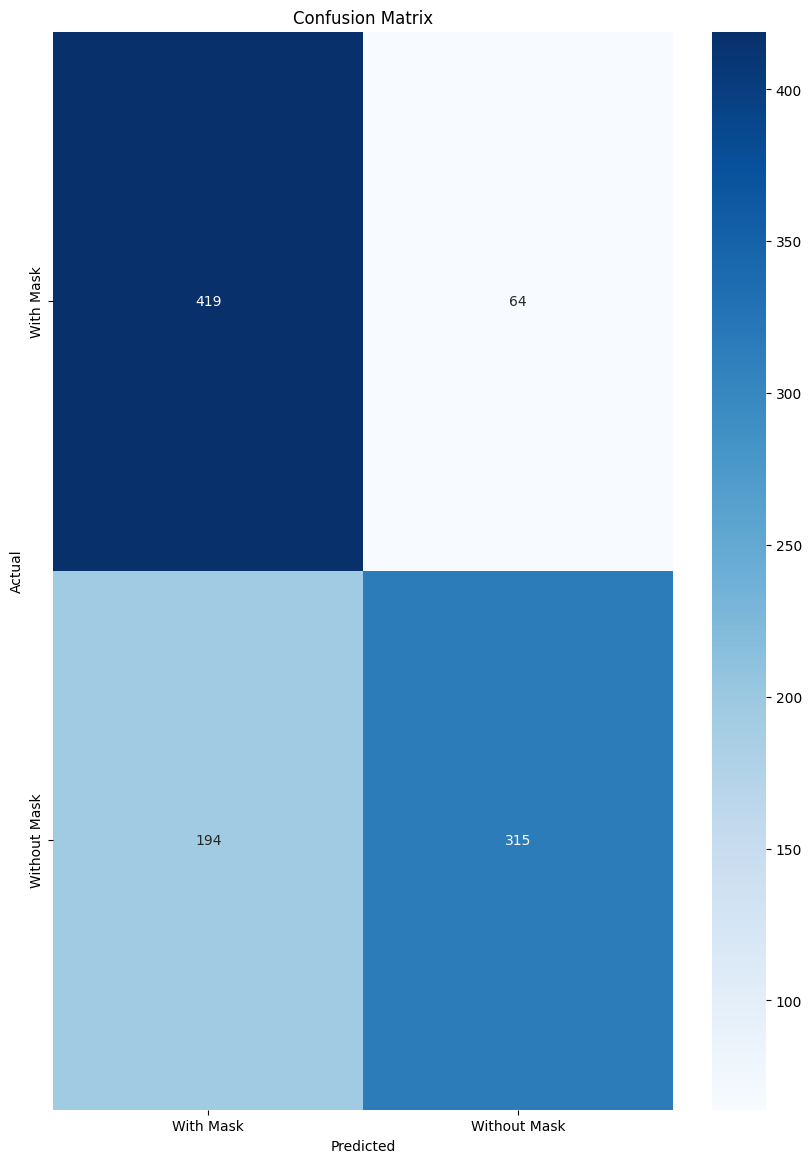

              precision    recall  f1-score   support

    WithMask       0.68      0.87      0.76       483
 WithoutMask       0.83      0.62      0.71       509

    accuracy                           0.74       992
   macro avg       0.76      0.74      0.74       992
weighted avg       0.76      0.74      0.74       992



NameError: name 'history' is not defined

In [7]:
evaluate_model(model, test_ds)

y_true, y_pred = get_predictions(model, test_ds)
plot_confusion_matrix(y_true, y_pred)
plot_history(history, fine_history)

## Save Model

Save the trained model.

In [ ]:
model.save('models/mask_detector.h5')